<a href="https://www.kaggle.com/code/yaroslavaulin/hyperspectral-crops?scriptVersionId=139870509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/hyperspectral-library-of-agricultural-crops-usgs/GHISACONUS_2008_001_speclib.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
f = "/kaggle/input/hyperspectral-library-of-agricultural-crops-usgs/GHISACONUS_2008_001_speclib.csv"

In [3]:
df = pd.read_csv(f)

In [4]:
df.head()

,UniqueID,Country,AEZ,Image,Month,Year,jd,long,lat,Crop,...,X2254,X2264,X2274,X2285,X2295,X2305,X2315,X2325,X2335,X2345
0,1466,USA,7,EO1H0440332012234110KD_SGS_01,8,2012,234,-121.663419,38.534516,corn,...,8.432855,8.438398,8.585301,8.164735,7.882625,7.380592,7.327904,6.881876,6.616288,6.346634
1,1467,USA,7,EO1H0440332012234110KD_SGS_01,8,2012,234,-121.671589,38.504744,corn,...,8.682515,8.942595,9.179517,8.744633,8.510454,8.090403,7.894839,7.263033,6.536649,5.663291
2,1469,USA,7,EO1H0440332012234110KD_SGS_01,8,2012,234,-121.597588,38.614056,corn,...,6.841276,6.276240,6.150597,6.114164,5.934033,5.116303,4.833205,4.817732,4.652525,3.790456
3,1470,USA,7,EO1H0440332012234110KD_SGS_01,8,2012,234,-121.687293,38.571702,corn,...,6.679967,6.534779,6.430438,6.080465,6.201545,6.291307,6.922908,6.943876,6.461839,5.696439
4,1476,USA,7,EO1H0440332012234110KD_SGS_01,8,2012,234,-121.625189,38.572225,rice,...,5.256362,5.022666,4.988447,5.220789,5.726055,6.007986,4.820400,3.084297,1.322807,1.087548


In [5]:
df.shape[0]

6988

In [6]:
for c in df.columns:
    if c[0]!='X': print(c)

UniqueID
Country
AEZ
Image
Month
Year
jd
long
lat
Crop
Stage


In [7]:
wl_list = []

for c in df.columns:
    if c[0]=='X': wl_list.append(c)



In [8]:
# wavelength array in nm
wl = np.array([])

for c in df.columns:
    if c[0]=='X': wl = np.append(wl,int(c[1:]))
wl

array([ 437.,  447.,  457.,  468.,  478.,  488.,  498.,  508.,  518.,
        529.,  539.,  549.,  559.,  569.,  579.,  590.,  600.,  610.,
        620.,  630.,  641.,  651.,  661.,  671.,  681.,  691.,  702.,
        712.,  722.,  732.,  742.,  752.,  763.,  773.,  783.,  793.,
        803.,  813.,  824.,  834.,  844.,  854.,  864.,  875.,  885.,
        895.,  905.,  912.,  915.,  923.,  983.,  993., 1003., 1013.,
       1023., 1033., 1044., 1054., 1064., 1074., 1084., 1094., 1175.,
       1185., 1195., 1205., 1215., 1225., 1235., 1245., 1255., 1266.,
       1276., 1286., 1296., 1306., 1316., 1518., 1528., 1538., 1548.,
       1558., 1568., 1578., 1588., 1599., 1609., 1619., 1629., 1639.,
       1649., 1659., 1669., 1679., 1689., 1699., 1710., 1720., 1730.,
       1740., 1750., 1760., 2063., 2073., 2083., 2093., 2103., 2113.,
       2123., 2133., 2143., 2153., 2163., 2174., 2184., 2194., 2204.,
       2214., 2224., 2234., 2244., 2254., 2264., 2274., 2285., 2295.,
       2305., 2315.,

In [9]:
df["Crop"].unique()

array(['corn', 'rice', 'cotton', 'soybean', 'winter_wheat'], dtype=object)

In [10]:
df["Stage"].unique()

array(['Critical', 'Early_Mid', 'Late', 'Mature_Senesc', 'Harvest',
       'Emerge_VEarly'], dtype=object)

In [11]:
df_corn = df[df["Crop"] == 'corn']
df_corn.shape[0]

2622

In [12]:
df_rice = df[df["Crop"] == 'rice']
df_rice.shape[0]

116

In [13]:
df_cotton = df[df["Crop"] == 'cotton']
df_cotton.shape[0]

823

In [14]:
df_soybean = df[df["Crop"] == 'soybean']
df_soybean.shape[0]

2086

In [15]:
df_winter_wheat = df[df["Crop"] == 'winter_wheat']
df_winter_wheat.shape[0]

1341

In [16]:
df[wl_list].head()

,X437,X447,X457,X468,X478,X488,X498,X508,X518,X529,...,X2254,X2264,X2274,X2285,X2295,X2305,X2315,X2325,X2335,X2345
0,17.724022,16.105696,15.024523,14.715921,14.441503,14.166527,13.830132,13.708207,13.912823,14.214426,...,8.432855,8.438398,8.585301,8.164735,7.882625,7.380592,7.327904,6.881876,6.616288,6.346634
1,17.850463,15.999081,15.013466,14.782901,14.501259,14.257706,13.966769,13.921256,14.178185,14.571256,...,8.682515,8.942595,9.179517,8.744633,8.510454,8.090403,7.894839,7.263033,6.536649,5.663291
2,17.566144,15.844705,14.903485,14.906514,14.673835,14.297178,13.872969,13.699403,13.894069,14.166823,...,6.841276,6.276240,6.150597,6.114164,5.934033,5.116303,4.833205,4.817732,4.652525,3.790456
3,17.509762,15.825789,14.863198,14.759544,14.411682,14.147443,13.909676,13.831227,14.125468,14.545580,...,6.679967,6.534779,6.430438,6.080465,6.201545,6.291307,6.922908,6.943876,6.461839,5.696439
4,17.540088,15.498984,14.596975,14.237083,13.915319,13.491013,12.943444,12.584902,12.541382,12.657275,...,5.256362,5.022666,4.988447,5.220789,5.726055,6.007986,4.820400,3.084297,1.322807,1.087548


In [17]:
spectra = df[wl_list].transpose()

In [18]:
spectra["Wavelength, nm"] = wl

In [19]:
spectra.head()

,0,1,2,3,4,5,6,7,8,9,...,6979,6980,6981,6982,6983,6984,6985,6986,6987,"Wavelength, nm"
X437,17.724022,17.850463,17.566144,17.509762,17.540088,16.648189,17.699469,18.828728,18.093873,17.598345,...,19.205628,19.470011,19.075060,19.143587,19.002399,19.727713,19.853683,19.295877,19.367271,437.0
X447,16.105696,15.999081,15.844705,15.825789,15.498984,15.031340,15.695622,17.082747,16.324612,15.924054,...,17.517666,16.975997,17.190553,16.899441,17.121772,17.425258,17.228156,17.370442,17.137878,447.0
X457,15.024523,15.013466,14.903485,14.863198,14.596975,14.110798,14.780258,16.035258,15.369231,14.515827,...,16.496059,16.055425,16.122644,15.909863,16.297446,16.291641,16.094961,16.210124,16.004380,457.0
X468,14.715921,14.782901,14.906514,14.759544,14.237083,13.906287,14.845887,15.752055,15.028049,14.367920,...,16.244625,15.901307,15.841325,15.370978,15.874480,15.913486,15.927941,15.874890,15.718635,468.0
X478,14.441503,14.501259,14.673835,14.411682,13.915319,13.656374,14.698671,15.508538,14.726458,13.955772,...,16.064577,15.698836,15.539229,15.049929,15.508477,15.603432,15.599947,15.551379,15.272987,478.0


# Corn

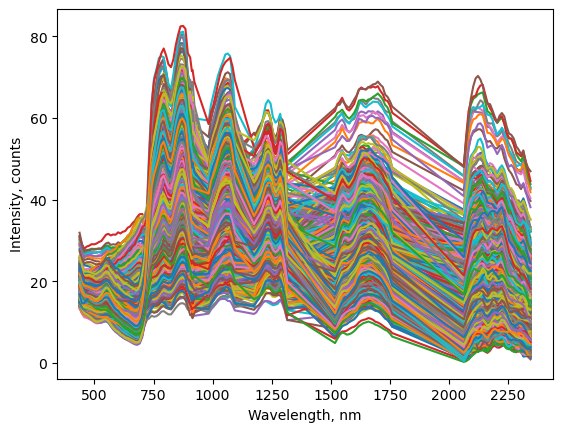

In [20]:
for i in df_corn.index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    
    sns.lineplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")
   


In [21]:
df["Stage"].unique()

array(['Critical', 'Early_Mid', 'Late', 'Mature_Senesc', 'Harvest',
       'Emerge_VEarly'], dtype=object)

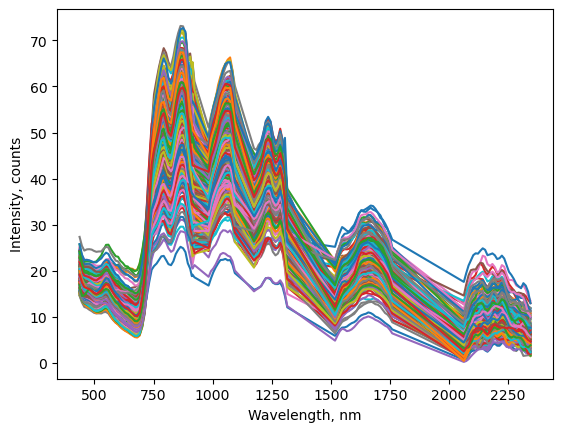

In [22]:
for i in df_corn[df_corn["Stage"] == "Critical"].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    
    sns.lineplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

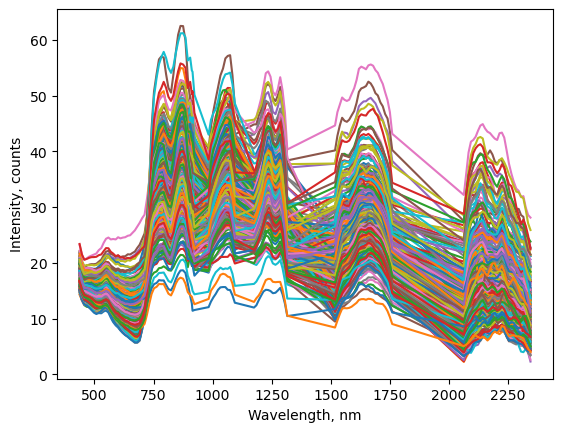

In [23]:
for i in df_corn[df_corn["Stage"] == "Early_Mid"].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    
    sns.lineplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

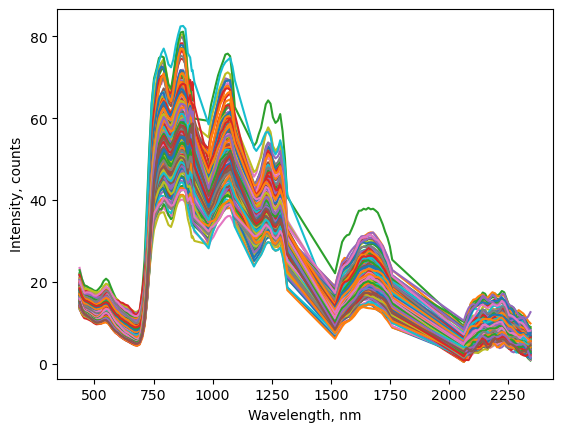

In [24]:
for i in df_corn[df_corn["Stage"] == "Late"].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    
    sns.lineplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

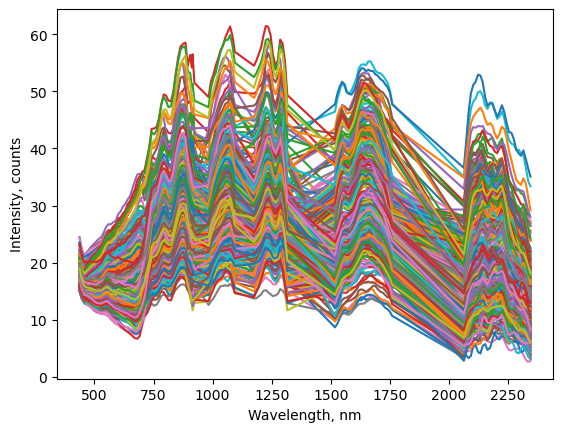

In [25]:
for i in df_corn[df_corn["Stage"] == "Mature_Senesc"].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    
    sns.lineplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

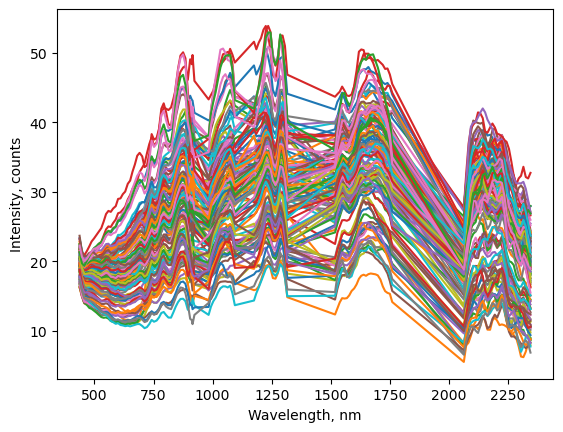

In [26]:
for i in df_corn[df_corn["Stage"] == "Harvest"].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    
    sns.lineplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

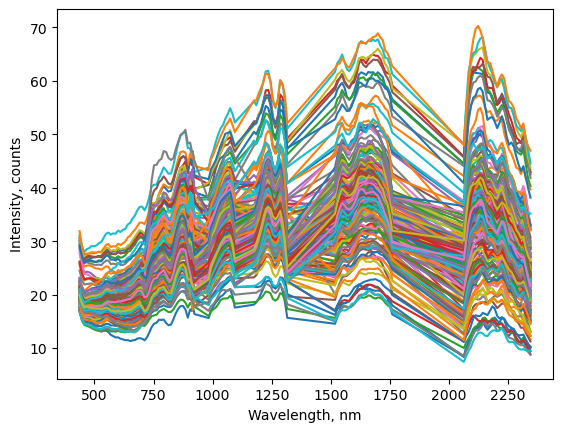

In [27]:
for i in df_corn[df_corn["Stage"] == "Emerge_VEarly"].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    
    sns.lineplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")